Official documentation:
http://powietrze.gios.gov.pl/pjp/content/api#

In [1]:
%matplotlib inline

In [2]:
import requests
from pandas.io.json import json_normalize
import pandas as pd

Getting all stations:

In [3]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/station/findAll')

In [4]:
allStations = json_normalize(r.json())

In [5]:
print(allStations[allStations["city.name"] == u"Gdańsk"])

                  addressStreet  city city.commune.communeName  \
2   ul. Powstańców Warszawskich   NaN                   Gdańsk   
14                 ul. Kaczeńce   NaN                   Gdańsk   
26               ul. Wyzwolenia   NaN                   Gdańsk   
69                 ul. Leczkowa   NaN                   Gdańsk   
77                ul. Ostrzycka   NaN                   Gdańsk   

   city.commune.districtName city.commune.provinceName  city.id city.name  \
2                     Gdańsk                 POMORSKIE    218.0    Gdańsk   
14                    Gdańsk                 POMORSKIE    218.0    Gdańsk   
26                    Gdańsk                 POMORSKIE    218.0    Gdańsk   
69                    Gdańsk                 POMORSKIE    218.0    Gdańsk   
77                    Gdańsk                 POMORSKIE    218.0    Gdańsk   

   dateEnd            dateStart    gegrLat    gegrLon   id  \
2     None  1996-10-01 12:00:00  54.353336  18.635283  729   
14    None  1996

Lets see what we have in "AM5 Gdańsk Szadółki" which has id: 733

In [6]:
stationId = 733

In [7]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/station/sensors/' + str(stationId))

In [8]:
sensors = json_normalize(r.json())

In [9]:
print(sensors)

     id  param.idParam param.paramCode param.paramFormula  \
0  4720              8              CO                 CO   
1  4727              3            PM10               PM10   
2  4723              6             NO2                NO2   
3  4725              5              O3                 O3   
4  4730              1             SO2                SO2   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0         tlenek węgla          None  1998-05-01 12:00:00        733  
1  pył zawieszony PM10          None  1998-05-01 12:00:00        733  
2      dwutlenek azotu          None  1998-05-01 12:00:00        733  
3                 ozon          None  1998-05-01 12:00:00        733  
4     dwutlenek siarki          None  1998-05-01 12:00:00        733  


Lets now see data about PM10 concentration - sensorId = 4727

In [10]:
sensorId = 4727

In [11]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/data/getData/' + str(sensorId))

In [12]:
concentration = json_normalize(r.json())

In [13]:
concentrationFrame = pd.DataFrame()

In [14]:
concentrationFrame["dates"] = [d[u'date'] for d in concentration["values"].values.item()]
concentrationFrame["values"] = [d[u'value'] for d in concentration["values"].values.item()]

In [15]:
concentrationFrame.set_index(["dates"], inplace=True)
#concentrationFrame.sort_index(inplace=True)
# We cannot sort index, because it is not unique. There is 12 hours notation used, but without AM/PM distinction ;(
# But we can just reverse it until API will be fixed
concentrationFrame = concentrationFrame.iloc[::-1]

In [16]:
print(concentrationFrame)

                       values
dates                        
2017-04-18 01:00:00   4.60872
2017-04-18 02:00:00   1.00000
2017-04-18 03:00:00   8.82750
2017-04-18 04:00:00   4.15767
2017-04-18 05:00:00   7.86589
2017-04-18 06:00:00   4.47778
2017-04-18 07:00:00   8.80628
2017-04-18 08:00:00  16.62710
2017-04-18 09:00:00  20.00600
2017-04-18 10:00:00  12.23940
2017-04-18 11:00:00   8.05267
2017-04-18 12:00:00   8.93228
2017-04-18 01:00:00  13.93350
2017-04-18 02:00:00  12.10550
2017-04-18 03:00:00  20.18720
2017-04-18 04:00:00  17.33160
2017-04-18 05:00:00  20.82570
2017-04-18 06:00:00   9.27978
2017-04-18 07:00:00  16.89930
2017-04-18 08:00:00  15.77930
2017-04-18 09:00:00   1.33872
2017-04-18 10:00:00   5.34100
2017-04-18 11:00:00   5.63622
2017-04-19 12:00:00   6.58478
2017-04-19 01:00:00   5.25006
2017-04-19 02:00:00   1.00000
2017-04-19 03:00:00   8.22208
2017-04-19 04:00:00   3.90781
2017-04-19 05:00:00   9.38008
2017-04-19 06:00:00  20.59060
...                       ...
2017-04-19

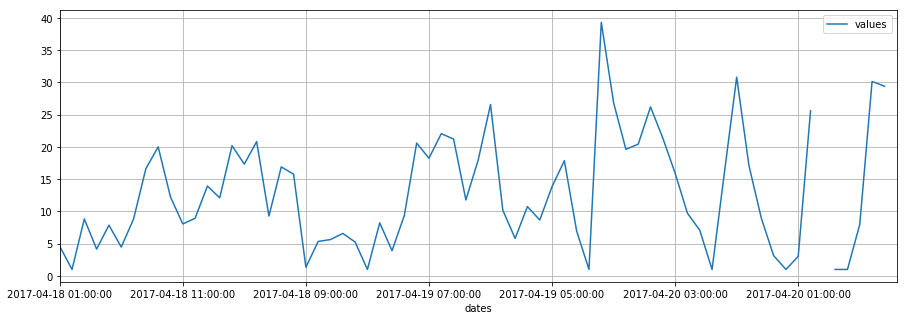

In [17]:
concentrationFrame.plot(figsize=(15,5), grid=True)

And overall air quality index for the same station

In [18]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/aqindex/getIndex/' + str(stationId))

In [19]:
r.json()

{u'c6h6CalcDate': None,
 u'c6h6IndexLevel': None,
 u'c6h6SourceDataDate': None,
 u'coCalcDate': u'2017-04-20 09:15:43',
 u'coIndexLevel': {u'id': 0, u'indexLevelName': u'Bardzo dobry'},
 u'coSourceDataDate': u'2017-04-20 08:00:00',
 u'id': 733,
 u'no2CalcDate': u'2017-04-20 09:15:43',
 u'no2IndexLevel': {u'id': 1, u'indexLevelName': u'Dobry'},
 u'no2SourceDataDate': u'2017-04-20 08:00:00',
 u'o3CalcDate': u'2017-04-20 09:15:43',
 u'o3IndexLevel': {u'id': 1, u'indexLevelName': u'Dobry'},
 u'o3SourceDataDate': u'2017-04-20 08:00:00',
 u'pm10CalcDate': u'2017-04-20 09:15:43',
 u'pm10IndexLevel': {u'id': 1, u'indexLevelName': u'Dobry'},
 u'pm10SourceDataDate': u'2017-04-20 08:00:00',
 u'pm25CalcDate': u'2017-04-20 09:15:43',
 u'pm25IndexLevel': None,
 u'pm25SourceDataDate': None,
 u'so2CalcDate': u'2017-04-20 09:15:43',
 u'so2IndexLevel': {u'id': 0, u'indexLevelName': u'Bardzo dobry'},
 u'so2SourceDataDate': u'2017-04-20 08:00:00',
 u'stCalcDate': u'2017-04-20 09:15:43',
 u'stIndexLevel': 